In [84]:
import os
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('dark_background')

%matplotlib inline

In [20]:
DATA = "../data/STARE/"
IMG  = os.path.join(DATA, "images")
LAB  = os.path.join(DATA, "labels-ah")

def make_path(p):
    return lambda x: os.path.join(p, x)

In [21]:
images = os.listdir(IMG)
labels = os.listdir(LAB)

p_img  = make_path(IMG)
p_lab  = make_path(LAB)

In [22]:
with open(p_img(images[0]), 'rb') as f:
    img_0 = f.read()

In [187]:
def read_ppm(path):
    with open(path, 'rb') as f:
        img = f.readlines()
        
    img = b''.join(line for line in img if not line.strip().startswith(b'#'))
    header, dims, maxval, img = img.split(b'\n', maxsplit=3)
    
    ch     = {b'P5': 1, b'P6': 3}[header]
    w, h   = [int(item) for item in dims.decode().split()]
    maxval = int(maxval)

    arr = np.array(np.frombuffer(img, dtype=np.uint8))
    arr = arr.reshape(h, w, ch)
    
    arr = arr.squeeze()
    
    return arr

In [188]:
img = read_ppm(p_img(images[0]))

In [189]:
lab = read_ppm(p_lab(labels[0]))

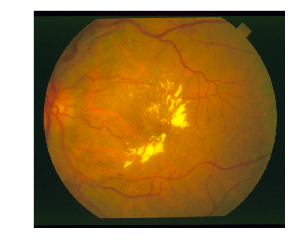

In [190]:
plt.imshow(img)

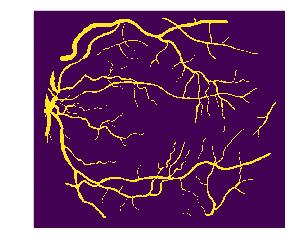

In [191]:
plt.imshow(lab)

In [229]:
imgs = [np.copy(mask).astype(np.float32), np.copy(mask).astype(np.float32)]
pres = [np.random.rand(*mask.shape).astype(np.float32), np.random.rand(*mask.shape).astype(np.float32)]

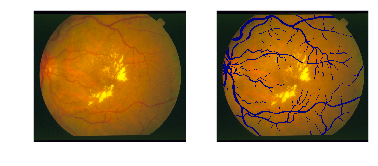

In [230]:
mask = lab.astype(np.bool)
plot_prediction(img, mask)

In [231]:
from torch.autograd import Variable as V

In [247]:
pwd

'/home/elan/Mine/ml-mine/code/UNet-pytorch'


Binary Cross Entropy: 1.0006436109542847
Accuracy: 0.49991145730018616
Euclidean Distance: 0.33360293263515384



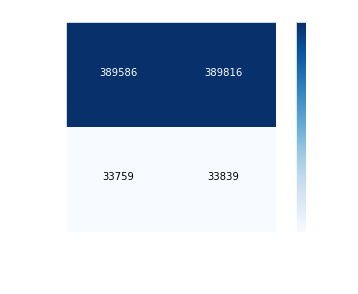

In [246]:
evaluate(imgs, pres)

In [198]:
img_c = np.copy(img)
img_c[mask, :] = [0, 0, 126]

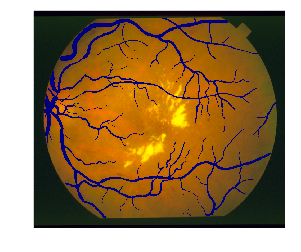

In [199]:
plt.imshow(img_c)

In [200]:
from sklearn.metrics import log_loss

In [202]:
import torch

In [201]:
a = np.array([
    [0.1, 0.1, 0.1, 0.1],
    [0.2, 0.2, 0.2, 0.2]
])

b = np.array([
    [0, 1, 0, 1],
    [1, 0, 0, 1]
])

torch.nn.CrossEntropyLoss()

ValueError: Multioutput target data is not supported with label binarization